<a href="https://colab.research.google.com/github/callaghan210-coder/Community-Website/blob/main/Electric_Vehicle_Population_by_Country_(2024)_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electric Vehicle Population by Country (2024)**

## About Dataset

This dataset shows the number of vehicles that were registered by Washington State Department of Licensing (DOL) each month. The data is separated by county for passenger vehicles and trucks.


The "Electric Vehicle Population Size History By County" dataset offers a comprehensive view of electric vehicle (EV) registrations, sourced from the Washington State Department of Licensing (DOL). Covering a date range from January 31, 2017, to February 29, 2024, the dataset includes counts of Battery Electric Vehicles (BEVs) and Plug-In Hybrid Electric Vehicles (PHEVs) by county and state. It also provides insights into the primary use of vehicles, total EV counts, non-electric vehicle counts, and the percentage of electric vehicles compared to traditional vehicles. With a strong emphasis on data quality, the dataset is well-documented, regularly updated on a monthly basis, and suitable for various data analytics and visualization tasks related to EV adoption trends, geographic distribution, and time series analysis.

This dataset, licensed under Apache 2.0, has garnered a usability rating of 10/10 and is commonly used for learning, research, and practical applications in data analytics and visualization. Its clean and well-maintained structure, coupled with high-quality notebooks, makes it ideal for conducting exploratory data analysis, creating insightful data visualizations, and telling compelling data-driven stories about the evolution of electric vehicle populations across different regions and over time.

## Import Libraries and Load the Dataset

In [ ]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/Sharon/Downloads/archive (2)/Electric_Vehicle_Population_Size_History_By_County_.csv")

# Display the first few rows
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


## Explore the dataset

In [ ]:

# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

## Data Preprocessing and Cleaning

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year into separate columns
df['Month'] = df['Date'].dt.strftime('%B')
df['Year'] = df['Date'].dt.year

df.head()



,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Month,Year
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50,September,2022
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57,December,2022
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03,January,2020
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00,June,2022
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19,July,2021


In [ ]:
df['Battery Electric Vehicles (BEVs)'].max()

'999'

In [ ]:
# Convert columns to numeric data types
numeric_columns = ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)',
                   'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Check conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20266 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20468 non-null  float64       
 6   Electric Vehicle (EV) Total               20119 non-null  float64       
 7   Non-Electric Vehicle Total                13983 non-null  float64       
 8   Total Vehicles                            13979 non-null  float64       
 9   Percent Electric Vehicles   

## Summary Statistics

In [ ]:
# Summary statistics for numerical columns
df.describe()

,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year
count,20819,20266.000000,20468.000000,20119.000000,13983.000000,13979.000000,20819.000000,20819.000000
mean,2020-11-13 19:57:00.855949056,25.855176,21.790942,31.623093,132.845312,134.463767,4.139216,2020.339161
min,2017-01-31 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000
25%,2019-03-31 00:00:00,0.000000,0.000000,1.000000,26.000000,27.000000,0.390000,2019.000000
50%,2020-12-31 00:00:00,1.000000,1.000000,1.000000,69.000000,70.000000,1.220000,2020.000000
75%,2022-07-31 00:00:00,2.000000,1.000000,3.000000,167.000000,169.000000,2.995000,2022.000000
max,2024-02-29 00:00:00,999.000000,999.000000,999.000000,999.000000,998.000000,100.000000,2024.000000
std,NaN,102.004224,92.309729,115.742017,174.033916,174.448753,11.055350,2.014528


## Data Visualizationt

##  Scatter plot

The scatter plot below displays the relationship between Battery Electric Vehicles (BEVs) and Plug-In Hybrid Electric Vehicles (PHEVs), providing insights into their distribution across different regions.

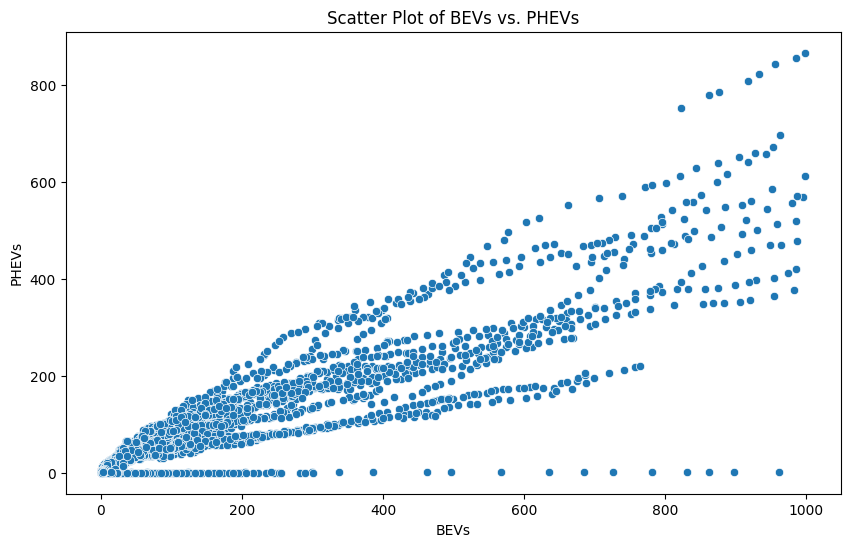

In [ ]:
# Plot 1: scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Electric Vehicles (BEVs)', y='Plug-In Hybrid Electric Vehicles (PHEVs)', data=df)
plt.title('Scatter Plot of BEVs vs. PHEVs')
plt.xlabel('BEVs')
plt.ylabel('PHEVs')
plt.show()

## Line plot

This line plot illustrates the trend of Electric Vehicle (EV) Total over time, showcasing the evolution of EV registrations across months .

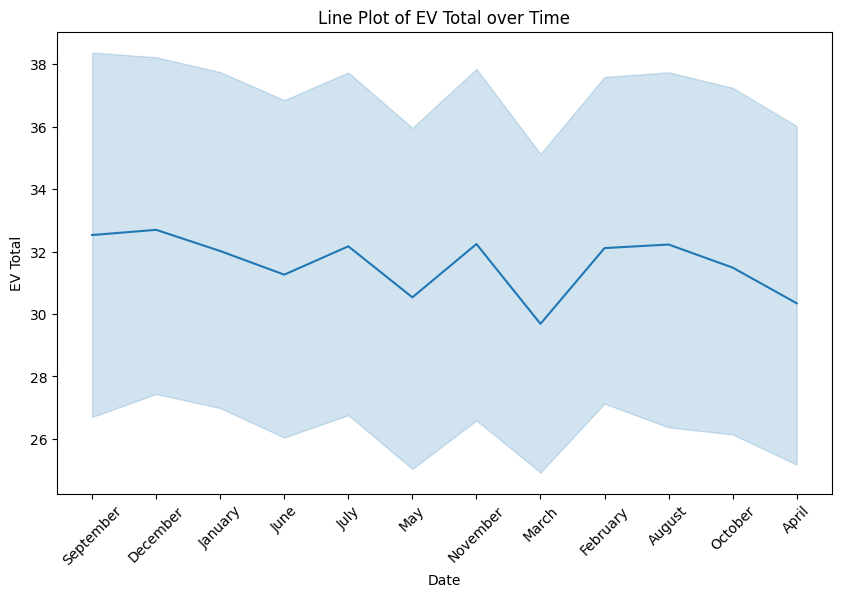

In [ ]:
# Plot 2:line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Electric Vehicle (EV) Total', data=df)
plt.title('Line Plot of EV Total over Time')
plt.xlabel('Date')
plt.ylabel('EV Total')
plt.xticks(rotation=45)
plt.show()

## Histogram

The histogram presents the distribution of Percent Electric Vehicles, offering a glimpse into the percentage of electric vehicles compared to traditional vehicles.

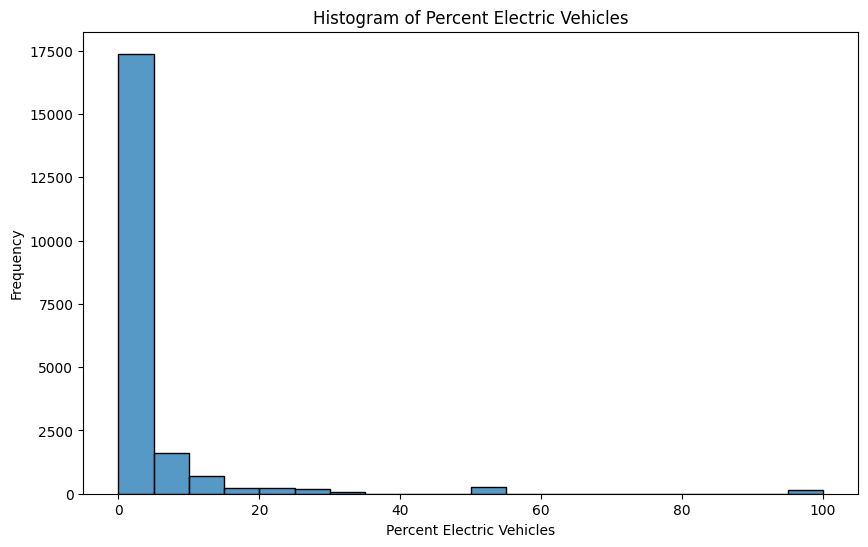

In [ ]:
# Plot 3:histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Percent Electric Vehicles', bins=20)
plt.title('Histogram of Percent Electric Vehicles')
plt.xlabel('Percent Electric Vehicles')
plt.ylabel('Frequency')
plt.show()

## Bar plot

The bar plot visualizes the relationship between Vehicle Primary Use and Percent Electric Vehicles, highlighting the distribution of electric vehicles across different vehicle types

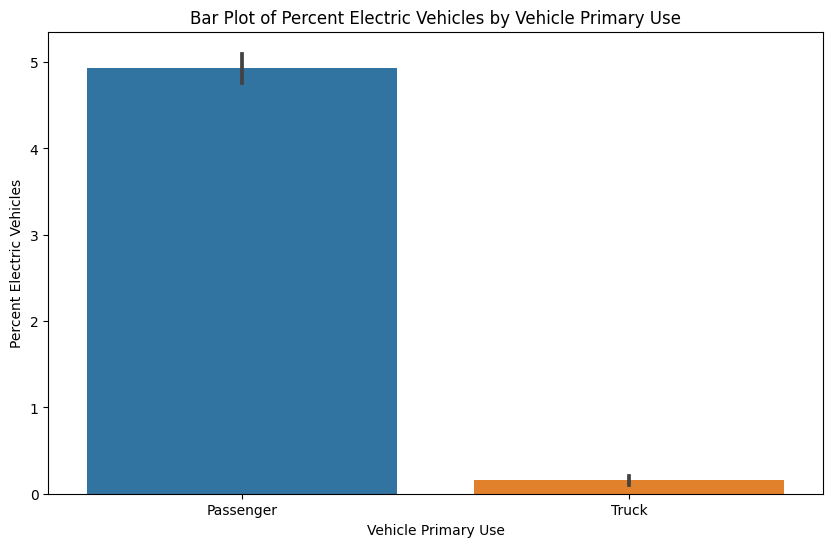

In [ ]:
# Plot 5: bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle Primary Use', y='Percent Electric Vehicles', data=df)
plt.title('Bar Plot of Percent Electric Vehicles by Vehicle Primary Use')
plt.xlabel('Vehicle Primary Use')
plt.ylabel('Percent Electric Vehicles')
plt.show()



## violin plot

The violin plot displays the distribution of Non-Electric Vehicle Total by Vehicle Primary Use, providing insights into the usage patterns of non-electric vehicles across different categories.

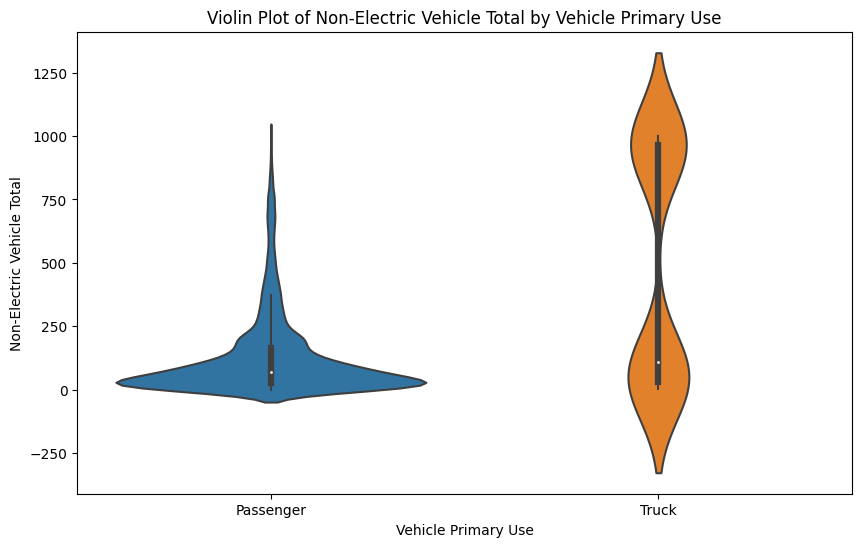

In [ ]:
# Plot 6:violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vehicle Primary Use', y='Non-Electric Vehicle Total', data=df)
plt.title('Violin Plot of Non-Electric Vehicle Total by Vehicle Primary Use')
plt.xlabel('Vehicle Primary Use')
plt.ylabel('Non-Electric Vehicle Total')
plt.show()

## Top 5 states with the largest number of electric Vehicles

The bar chart showcases the top 5 states with the largest number of electric vehicles, offering a regional perspective on electric vehicle adoption.

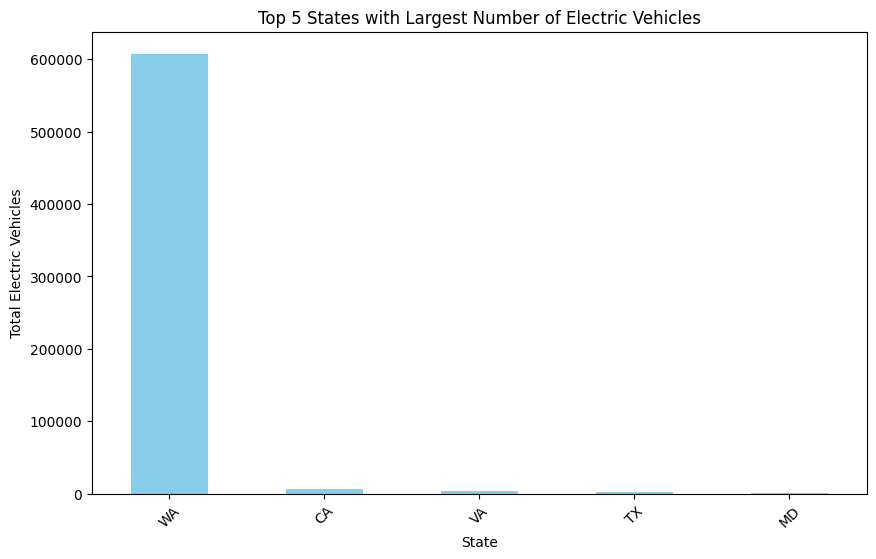

In [ ]:
# Convert 'Electric Vehicle (EV) Total' column to numeric data type
df['Electric Vehicle (EV) Total'] = pd.to_numeric(df['Electric Vehicle (EV) Total'], errors='coerce')

# Calculate total electric vehicles by state
ev_by_state = df.groupby('State')['Electric Vehicle (EV) Total'].sum()

# Sort states by total electric vehicles in descending order
ev_by_state_sorted = ev_by_state.sort_values(ascending=False)

# Select the top 5 states with the largest number of electric vehicles
top_5_states = ev_by_state_sorted.head(5)

# Plotting the top 5 states with the largest number of electric vehicles
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Largest Number of Electric Vehicles')
plt.xlabel('State')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=45)
plt.show()
